In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loi_rad():
  return np.random.choice([-1, 1])

def partie(a, b):
  X = [0]
  while -a < X[-1] < b:
    E = loi_rad()
    X.append(X[-1] + E)
  return X

def plot_traj(a, b, nb_traj):
  plt.figure(figsize = (10, 6))
  for _ in range(nb_traj):
    X = partie(a, b)
    plt.plot(range(len(X)), X)
  plt.axhline(y = -a, color = 'r', linestyle = '--', label = f'Limite -a ({-a})')
  plt.axhline(y = b, color = 'b', linestyle = '--', label = f'Limite b ({b})')
  plt.xlabel('n')
  plt.ylabel('Xn')
  plt.title(f'Trajectoires de Xn avec a = {a} et b = {b}')
  plt.legend()
  plt.show()


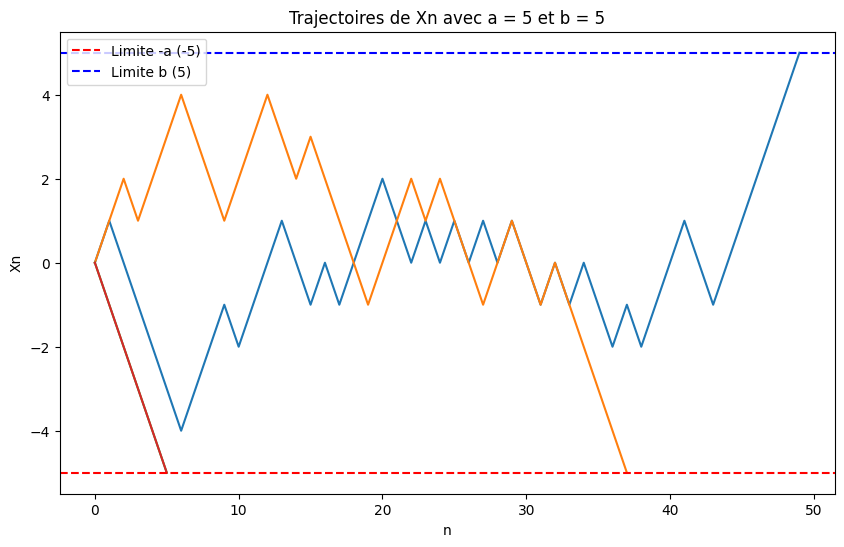

In [ ]:
 a = 5
b = 5
nb_traj = 4

plot_traj(a, b, nb_traj)

In [ ]:
def monte_carlo(a, b, nb_essais):
    S = 0
    for _ in range(nb_essais):
        X = 0
        while -a <= X <= b:
            E = loi_rad()
            X += E
            if X == b:
                S += 1
                break
    proba = S / nb_essais
    return proba


In [ ]:
a = 5
b = 5
nb_essais = 10000
val_emp = monte_carlo(a, b, nb_essais) # Valeur empirique obtenue par loi des grands nombres
print(val_emp)
val_th = a / (b+a) # Valeur théorique obtenue par calcul
diff = np.abs(val_emp - val_th)  # Différence entre valeur empirique et théorique en pourcentage
print(diff)

0.5483
0.04830000000000001


In [ ]:
def monte_carlo_esperance_T(a, b, nb_essais):
  esp_T = 0
  for _ in range(nb_essais):
    n = 0
    X = 0
    while -a <= X <= b:
      n += 1
      X += loi_rad()
    esp_T += n
  return esp_T / nb_essais

# Exemple d'utilisation
a = 5
b = 10
nb_essais = 50000
esperance_T_estimee = monte_carlo_esperance_T(a, b, nb_essais)
esperance_T_theorique = a*b
print(f"Espérance de T estimée: {esperance_T_estimee}")
print(f"Différence: {np.abs(esperance_T_estimee - esperance_T_theorique)}")

Espérance de T estimée: 66.20126
Différence: 16.201260000000005


In [ ]:
import random

def polya(A, B, n):
  proportions = []
  for _ in range(n):
    u = random.random()  # Tirage aléatoire uniforme
    if u <= A / (A + B):
      A += 1
    else:
      B += 1
    proportion_rouges = A / (A + B)
    proportions.append(proportion_rouges)
  return proportions


A = 2  # Initialisation du nombre  de boules rouges
B = 3  # Initialisation du nombre de boules bleues
n = 20  # Nombre de tirages aléatoires
proportions_rouges = polya(A, B, n)

# Affichage des résultats
print(f"Proportions de boules rouges après {n} tirages:")
print(proportions_rouges)

Proportions de boules rouges après 20 tirages:
[0.5, 0.42857142857142855, 0.5, 0.4444444444444444, 0.5, 0.5454545454545454, 0.5833333333333334, 0.6153846153846154, 0.6428571428571429, 0.6666666666666666, 0.6875, 0.7058823529411765, 0.7222222222222222, 0.7368421052631579, 0.75, 0.7142857142857143, 0.7272727272727273, 0.7391304347826086, 0.75, 0.76]


In [ ]:

def polya_trajectoire(A, B, n):

  proportions_rouges = []
  for _ in range(n):
    r = random.random()  # Tirage aléatoire uniforme
    if r <= A / (A + B):
      A += 1
    else:
      B += 1
    proportion_rouges = A / (A + B)
    proportions_rouges.append(proportion_rouges)
  return proportions_rouges

def tracer_trajectoires(nb_trajectoires, A_min, A_max, B_min, B_max, n_étapes):

  import matplotlib.pyplot as plt

  plt.figure(figsize=(12, 8))
  for i in range(nb_trajectoires):
    A = random.randint(A_min, A_max)
    B = random.randint(B_min, B_max)
    proportions_rouges = polya_trajectoire(A, B, n_étapes)
    plt.plot(proportions_rouges)

  plt.xlabel("Étape")
  plt.ylabel("Proportion de boules rouges")
  plt.title(f"{nb_trajectoires} trajectoires aléatoires (A entre [{A_min},{A_max}], B entre [{B_min},{B_max}], {n_étapes} étapes)")
  plt.grid(True)
  plt.show()

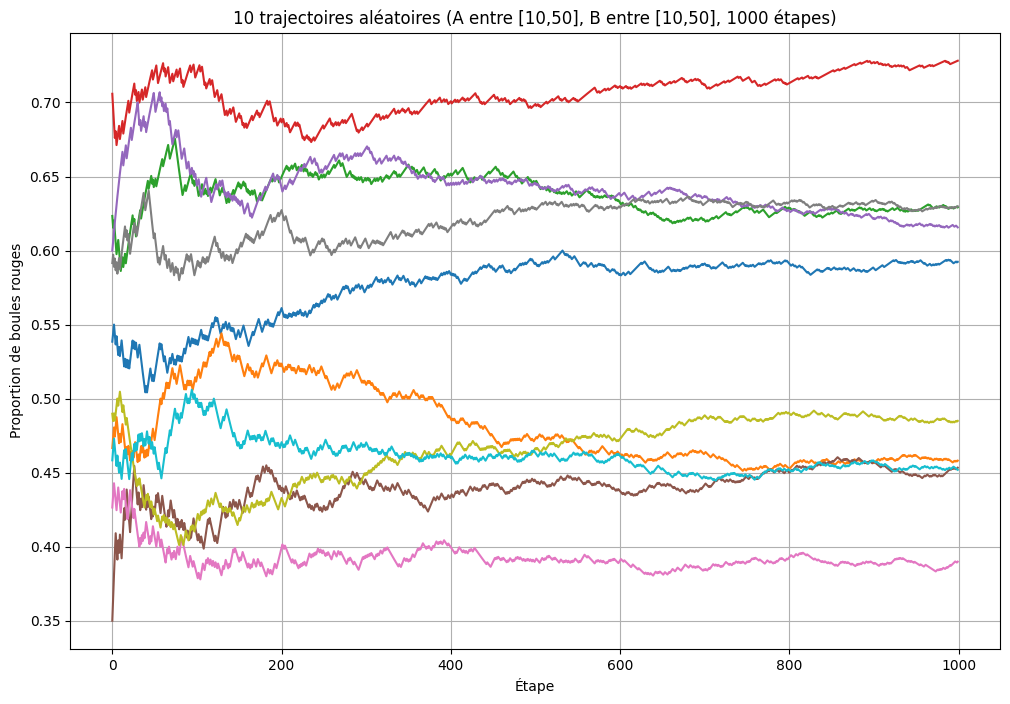

In [ ]:
tracer_trajectoires(10, 10, 50, 10, 50, 1000)

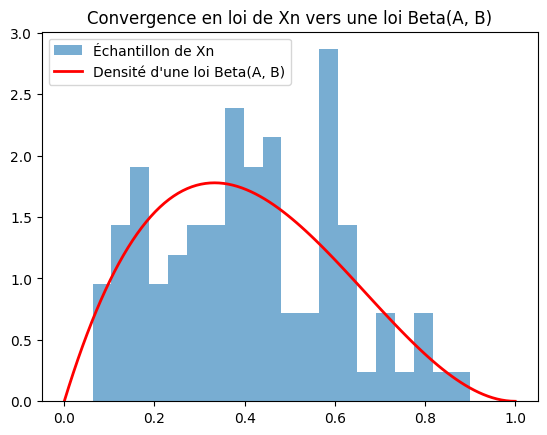

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parametres loi beta
A = 2
B = 3


K = 100 # Taille de l'échantillon
n = 1000 # Nombre d'étapes

# Génération de l'échantillon de Xn
sample_Xn = [polya(A, B, n)[-1] for _ in range(K)]

# Tracé de l'histogramme de l'échantillon
plt.hist(sample_Xn, bins=20, density=True, alpha=0.6, label='Échantillon de Xn')

# Ajout de la densité de la loi beta de paramètres A et B
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, beta.pdf(x_values, A, B), 'r', linewidth=2, label="Densité d'une loi Beta(A, B)")

plt.title("Convergence en loi de Xn vers une loi Beta(A, B)")
plt.legend()
plt.show()


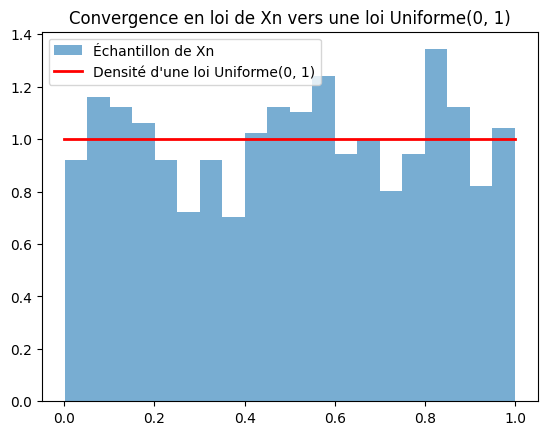

In [ ]:
import matplotlib.pyplot as plt

K = 1000 # Taille de l'échantillon
n = 1000 # Nombre d'étapes

# Génération de l'échantillon de Xn dans le cas A = B = 1
sample_Xn = [polya(1, 1, n)[-1] for _ in range(K)]

# Tracé de l'histogramme de l'échantillon
plt.hist(sample_Xn, bins=20, density=True, alpha=0.6, label='Échantillon de Xn')

# Ajout de la densité de la loi uniforme
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, np.ones_like(x_values), 'r', linewidth=2, label="Densité d'une loi Uniforme(0, 1)")

plt.title("Convergence en loi de Xn vers une loi Uniforme(0, 1)")
plt.legend()
plt.show()


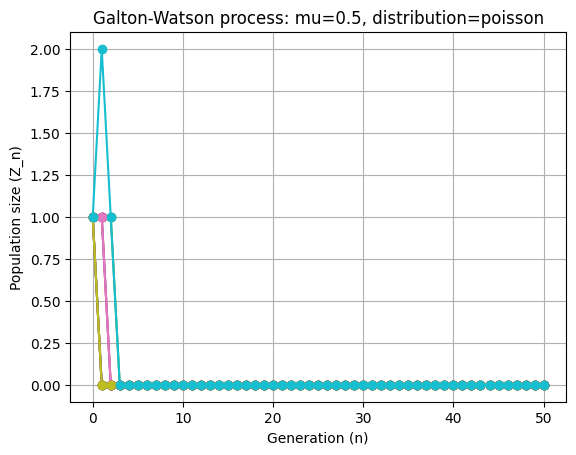

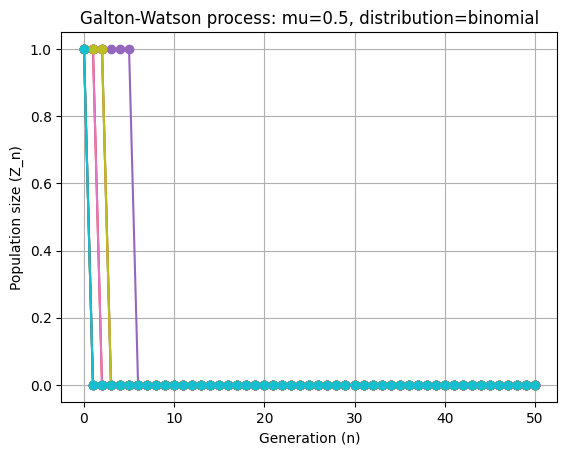

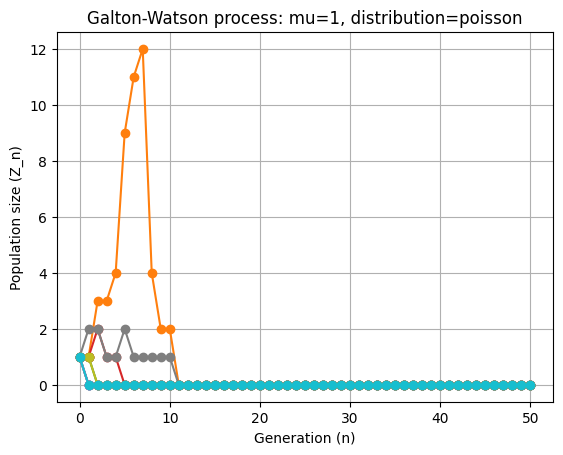

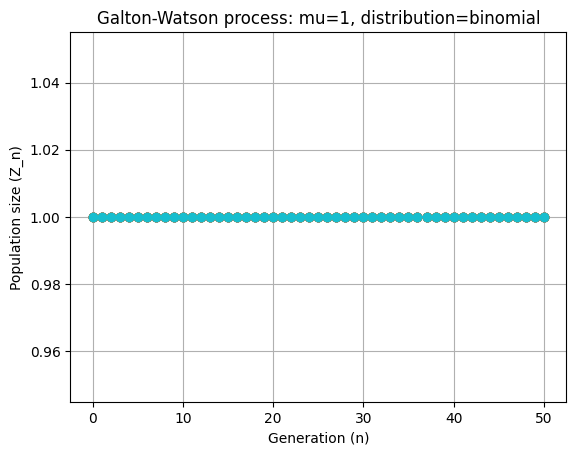

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def galton_watson(mu, distribution, num_generations, num_trials=1):
    traj = []

    for _ in range(num_trials):
        Z = [1]  # Z0 = 1
        for n in range(num_generations):
            Zn = Z[-1]
            if Zn == 0:
                Z.append(0)
                continue

            if distribution == 'poisson':
                # loi de Poisson de moyenne mu
                new_generation = np.random.poisson(mu, Zn)
            elif distribution == 'binomial':
                # loi Binomial de parametres n=1 et p=mu
                new_generation = np.random.binomial(1, mu, Zn)

            Z.append(np.sum(new_generation))

        traj.append(Z)

    return traj

def plot_trajectories(trajectories, mu, distribution):

    for trajectory in trajectories:
        plt.plot(trajectory, marker='o')

    plt.title(f"Galton-Watson process: mu={mu}, distribution={distribution}")
    plt.xlabel("Generation (n)")
    plt.ylabel("Population size (Z_n)")
    #plt.yscale("log")  # Log scale to better visualize the behavior
    plt.grid(True)
    plt.show()

# Example usage:
mu_values = [0.5, 1, 1.5]
distributions = ['poisson', 'binomial']
num_generations = 50
num_trials = 10

for mu in mu_values:
    for dist in distributions:
        trajectories = galton_watson(mu, dist, num_generations, num_trials)
        plot_trajectories(trajectories, mu, dist)


In [ ]:
import numpy as np


def galton_watson_trajectory(mu, distribution, num_generations):

    Z = [1]  # Z0 = 1
    for n in range(num_generations):
        Zn = Z[-1]
        if Zn == 0:
            Z.append(0)
            continue

        if distribution == 'poisson':
            new_generation = np.random.poisson(mu, Zn)
        elif distribution == 'binomial':
            new_generation = np.random.binomial(1, mu, Zn)

        Z.append(np.sum(new_generation))

    return Z

def monte_carlo_expectation(mu, distribution, num_generations, num_trials):

    Zn_totals = np.zeros(num_generations + 1)

    for _ in range(num_trials):
        trajectory = galton_watson_trajectory(mu, distribution, num_generations)
        Zn_totals += trajectory

    Zn_expectation = Zn_totals / num_trials
    return Zn_expectation


mu = 1.5
distribution = 'poisson'
num_generations = 50
num_trials = 10000

Zn_expectation = monte_carlo_expectation(mu, distribution, num_generations, num_trials)


for n, E_Zn in enumerate(Zn_expectation):
    print(f"E[Z_{n}] ≈ {E_Zn:.4f}")


import matplotlib.pyplot as plt

plt.plot(Zn_expectation, marker='o')
plt.title(f"E[Z_n]: mu={mu}, distribution={distribution}")
plt.xlabel("Generation (n)")
plt.ylabel("E[Z_n]")
plt.yscale("log")
plt.grid(True)
plt.show()